In [65]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster

import os
from yellowbrick.cluster import SilhouetteVisualizer

import math
import scipy

In [66]:
seed = 0
np.random.seed(seed)
bank_poor_ts = pd.read_csv('SimData/bank_reserves_outputs_poor.csv', header=None)
X_train_poor = to_time_series_dataset(bank_poor_ts)
km = TimeSeriesKMeans(n_clusters=12, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train_poor)

4017.649 --> 2592.735 --> 2558.625 --> 2547.106 --> 2540.690 --> 2536.866 --> 2534.635 --> 2533.267 --> 2532.121 --> 2531.338 --> 2530.791 --> 2530.386 --> 2530.051 --> 2529.738 --> 2529.515 --> 2529.364 --> 2529.210 --> 2529.070 --> 2528.954 --> 2528.850 --> 2528.749 --> 2528.619 --> 2528.486 --> 2528.369 --> 2528.275 --> 2528.181 --> 2528.099 --> 2528.014 --> 2527.948 --> 2527.897 --> 2527.858 --> 2527.836 --> 2527.822 --> 2527.808 --> 2527.799 --> 2527.790 --> 2527.782 --> 2527.776 --> 2527.773 --> 2527.771 --> 2527.771 --> 2527.770 --> 2527.770 --> 2527.770 --> 2527.770 --> 2527.770 --> 2527.770 --> 2527.769 --> 2527.769 --> 2527.769 --> 


## Visualization Function

In [90]:
def ts_cluster_visualization(y_pred, df, n_clusters, plot_title):
    ts_size = df.shape[1]
    ts_max = df.max()
    plt.figure()
    for cluster in range(n_clusters):
        plt.subplot(4, math.ceil(n_clusters/4), cluster+1)
        for ts in df[y_pred == cluster]:
            plt.plot(ts.ravel(), "k-", alpha=.2)
        plt.plot(np.mean(df[y_pred == cluster], axis=0), "r-")
        plt.xlim(0, ts_size)
        plt.ylim(0, ts_max)
        plt.text(0.55, 0.35,'Cluster %d' % (cluster),
                 transform=plt.gca().transAxes)
        if cluster == 1:
            plt.title(plot_title)      
    plt.tight_layout()
    plt.show()

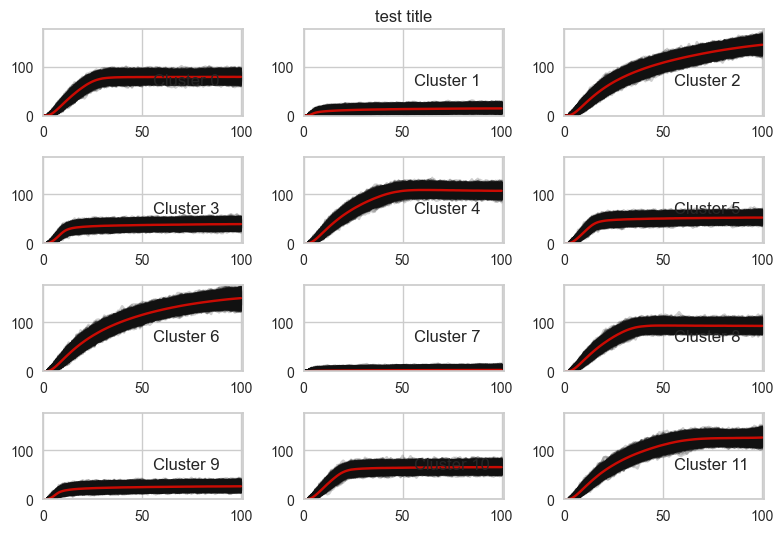

In [91]:
ts_cluster_visualization(y_pred, X_train_poor, 12, "test title")

## Distance Function

In [92]:
def ts_cluster_distance(y_pred, df, n_clusters, distance_measure):
    distances = list()
    for cluster in range(n_clusters):
        cluster_center = np.mean(df[y_pred == cluster], axis=0)
        for ts in df[y_pred == cluster]:
            if(distance_measure == "Euclidean"):
                diff = np.sqrt(np.sum((ts.ravel() - cluster_center)**2))
                distances.append(diff)
    return np.mean(distances)

In [93]:
x = ts_cluster_distance(y_pred, X_train_poor, 12, "Euclidean")
print(x)

3937.4347955542453


In [71]:
bank_PCA = pd.read_csv("extracted_features/bank_reserves_PCA.csv", index_col=0)
kmeans = KMeans(n_clusters=12)
ypred = kmeans.fit_predict(bank_PCA)

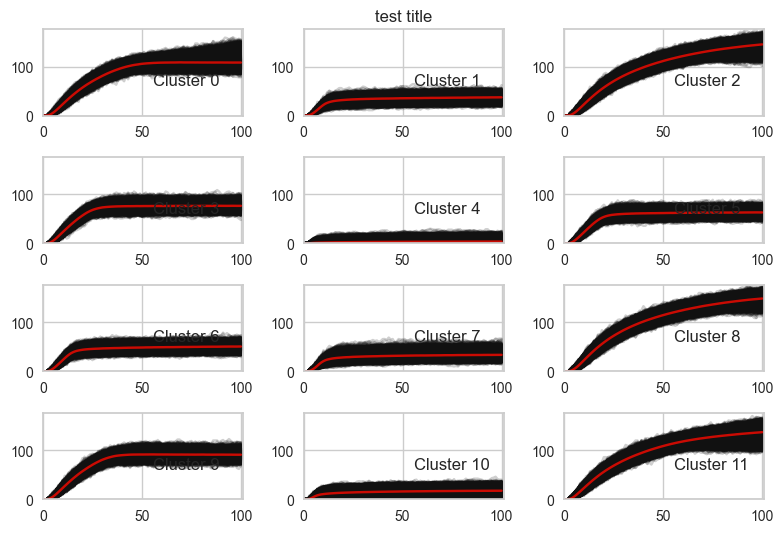

In [94]:
ts_cluster_visualization(ypred, X_train_poor, 12, "test title")

In [95]:
x = ts_cluster_distance(ypred, X_train_poor, 12, "Euclidean")
print(x)

3964.265526920357


In [96]:
sklearn.metrics.adjusted_rand_score(y_pred, ypred)

0.43505643273505445